# Import required libraries, load the dataset, and display the first 5 records

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory=False)
# Display top 5 rows
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 23:59,1/1/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 23:59,1/1/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 23:59,1/1/2016 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 23:57,1/1/2016 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 23:56,1/1/2016 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
# Diplay column names
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [4]:
# Check for duplicates
df.duplicated(subset="Unique Key").sum()

0

# Perform missing value treatment on null / NaN / missing values

In [5]:
#Identify the shape of the dataset
df.shape

(364558, 53)

In [6]:
#Identify variables with null values
#Display only columns that contain at least 1 null value
df.isna().sum().loc[lambda x : x > 0]

Closed Date                         2381
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Due Date                               3
Resolution Action Updated Date      2402
X Coordinate (State Plane)          4030
Y Coordinate (State Plane)          4030
School Region                          1
School Code                            1
School Zip                             1
School or Citywide Complaint      364558
Vehicle Type                      364558
Taxi Company Borough              364558
Taxi Pick Up Loc

In [7]:
# Implement missing value treatment
#Keep only columns with at least a non null value in df2
df2 = df.dropna(axis=1, how='all')
len(df2.columns)

48

In [8]:
# Implement missing value treatment
#Get the non numeric columns
cat_col = df2.select_dtypes(include ='O').columns

#Get the numeric columns
num_col = df2.select_dtypes(include ='number').columns
print(len(cat_col))
print(len(num_col))

42
6


In [9]:
# Implement missing value treatment
#Fill categorical null values with "Missing"
df_cat = df2.select_dtypes(include ='O').fillna("Missing")
df_cat.shape

(364558, 42)

In [10]:
# Implement missing value treatment
#Fill numberical null values with the most occuring class
df_num = df2[num_col].fillna(value=df2[num_col].mean())
df_num.shape

(364558, 6)

In [11]:
# Implement missing value treatment
#Combined the categorical and numerical columsn created
df_clean = pd.concat([df_cat, df_num], axis=1)
df_clean.shape

(364558, 48)

# Remove incorrect entries from date columns

In [12]:
# Analyze the date column and remove the entries if it has an incorrect timeline
np.where(df_clean["Created Date"] == "Missing")

(array([], dtype=int64),)

In [13]:
# Analyze the date column and remove the entries if it has an incorrect timeline
#No "Missing" string found in column "Created Date", converting to datetime
df_clean["Created Date"] = pd.to_datetime(df_clean["Created Date"])
#We then clean for null DateTime
df_clean = df_clean[df["Created Date"].notnull()].reset_index(drop=True)
df_clean.shape

(364558, 48)

In [14]:
# Analyze the date column and remove the entries if it has an incorrect timeline
np.where(df_clean["Closed Date"] == "Missing")

(array([   416,    611,   1648, ..., 363805, 364151, 364349], dtype=int64),)

In [15]:
# Analyze the date column and remove the entries if it has an incorrect timeline
#"Missing" string found in column "Closed Date", we first drop those rows
df_clean = df_clean[df["Closed Date"].notnull()]
np.where(df_clean["Closed Date"] == "Missing")

(array([], dtype=int64),)

In [16]:
# Analyze the date column and remove the entries if it has an incorrect timeline
df_clean.shape

(362177, 48)

In [17]:
# Analyze the date column and remove the entries if it has an incorrect timeline
#Convert "Closed Date" column to DateTime
df_clean["Closed Date"] = pd.to_datetime(df_clean["Closed Date"])
#We then clean for null DateTime
df_clean = df_clean[df["Closed Date"].notnull()].reset_index(drop=True)
df_clean.shape

C:\Users\ahtch\AppData\Local\Temp\ipykernel_81368\3483330711.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[df["Closed Date"].notnull()].reset_index(drop=True)


(362177, 48)

# Frequency plot of city wide complaints

<Axes: xlabel='City'>

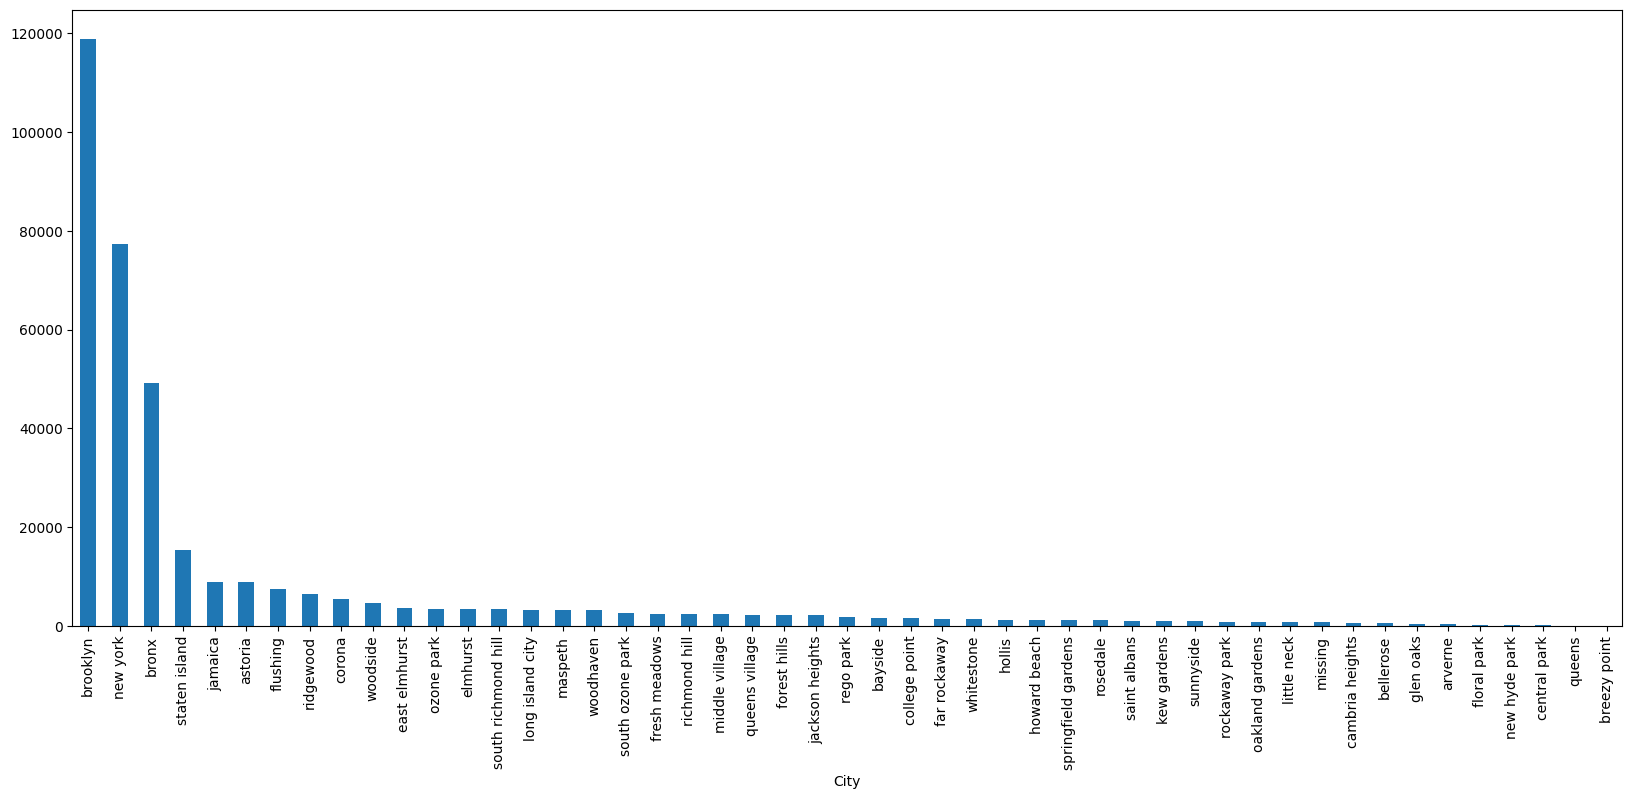

In [18]:
# Draw a frequency plot for city-wise complaints
df_clean["City"] = df_clean["City"].str.lower()

df_clean["City"].value_counts().plot(kind="bar", figsize=(20, 8))

# Scatter and hexbin plots for complaint concentration across Brooklyn 

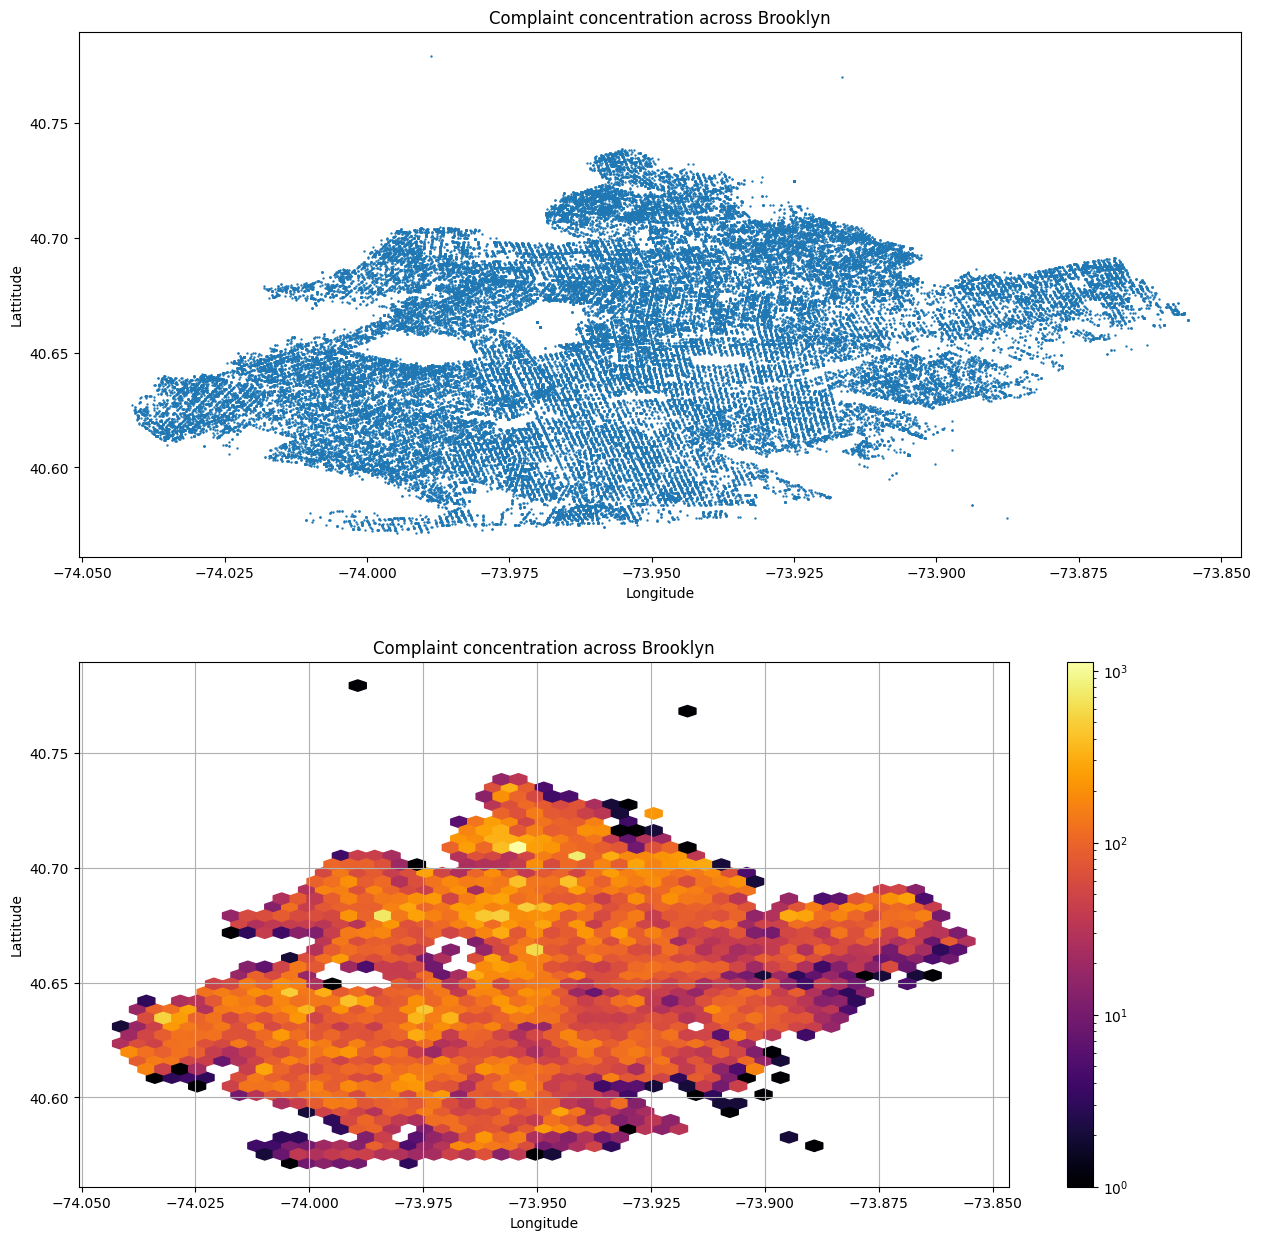

In [19]:
# Draw scatter and hexbin plots for complaint concentration across Brooklyn
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2,1, figsize=(15,15))

df_brooklyn = df_clean[df_clean["City"] == "brooklyn"].reset_index()

ax = axs[0]
ax.scatter(df_brooklyn['Longitude'], df_brooklyn['Latitude'], s = 0.5)
ax.set_title('Complaint concentration across Brooklyn')
ax.set_xlabel('Longitude')
ax.set_ylabel('Lattitude')
plt.grid(True)

ax = axs[1]
hb = ax.hexbin(df_brooklyn['Longitude'], df_brooklyn['Latitude'], gridsize=50, bins='log', cmap='inferno')
ax.set_title('Complaint concentration across Brooklyn')
ax.set_xlabel('Longitude')
ax.set_ylabel('Lattitude')
plt.grid(True)
fig.colorbar(hb, ax=ax)

plt.show()

<Axes: xlabel='Complaint Type'>

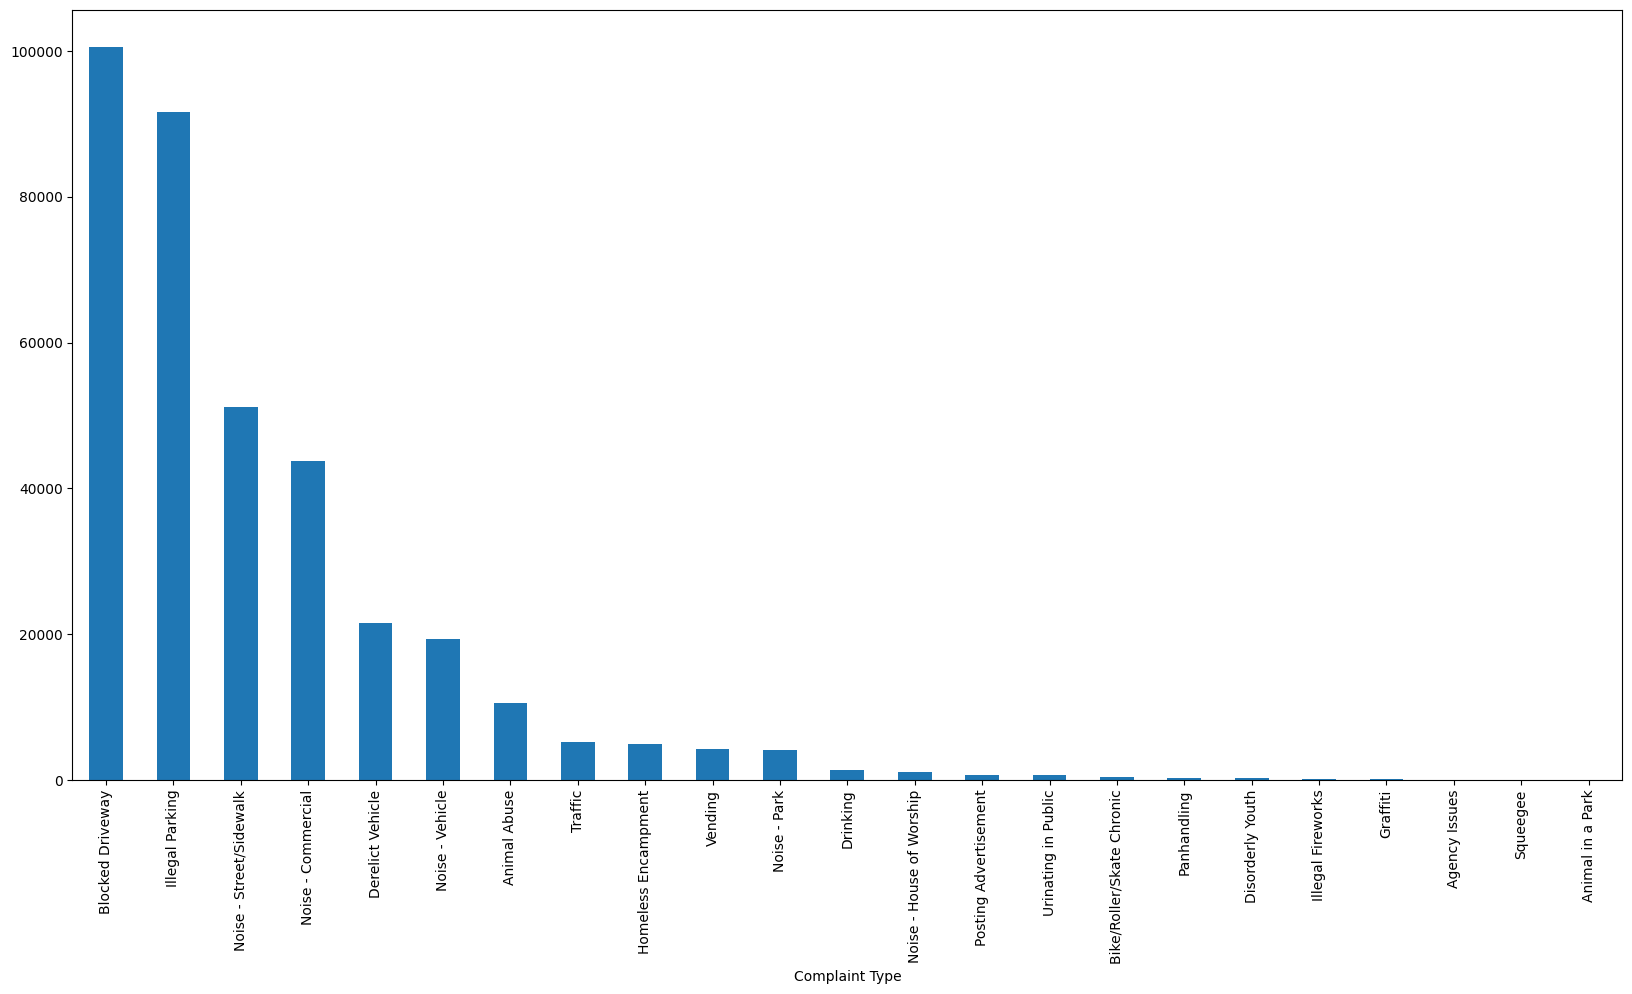

In [20]:
# Plot a bar graph of count vs. complaint types
df_clean["Complaint Type"].value_counts().plot(kind="bar", figsize=(20,10))

# Find the major types of complaints

In [21]:
# Find the top 10 types of complaints
df_clean["Complaint Type"].value_counts().nlargest(10).index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle',
       'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Vending'],
      dtype='object', name='Complaint Type')

In [31]:
# Display the types of complaints in each city in a separate dataset
#We will put each city's types of complaints in an entry in a dictionary
dict_city_complaint_type = {}
for city in np. unique(df_clean["City"].str.lower().values):
    dict_city_complaint_type[city] = df_clean[df_clean["City"].str.lower() == city]["Complaint Type"].value_counts()
dict_city_complaint_type

{'arverne': Complaint Type
 Illegal Parking             62
 Blocked Driveway            50
 Animal Abuse                46
 Derelict Vehicle            32
 Noise - Street/Sidewalk     29
 Noise - House of Worship    14
 Noise - Vehicle             10
 Homeless Encampment          4
 Noise - Commercial           2
 Disorderly Youth             2
 Noise - Park                 2
 Urinating in Public          1
 Panhandling                  1
 Vending                      1
 Drinking                     1
 Graffiti                     1
 Traffic                      1
 Name: count, dtype: int64,
 'astoria': Complaint Type
 Blocked Driveway             3595
 Noise - Commercial           1963
 Illegal Parking              1617
 Noise - Street/Sidewalk       554
 Derelict Vehicle              440
 Noise - Vehicle               236
 Animal Abuse                  170
 Noise - Park                   64
 Traffic                        60
 Vending                        57
 Drinking               

# Display the major type of complaints in each city

In [23]:
# Visualize the major types of complaints in each city
df[['City', 'Complaint Type', 'Unique Key']].groupby(['City', 'Complaint Type']).count()

Unique Key
City     Complaint Type                     
ARVERNE  Animal Abuse                     46
         Blocked Driveway                 50
         Derelict Vehicle                 32
         Disorderly Youth                  2
         Drinking                          1
...                                      ...
Woodside Blocked Driveway                 27
         Derelict Vehicle                  8
         Illegal Parking                 124
         Noise - Commercial                2
         Noise - Street/Sidewalk           5

[777 rows x 1 columns]

# What is the average response time across various types of complaints

In [25]:
# Check the average response time across various types of complaints
#We assume that the response time is the difference betwen the 'Close date' and the 'Open date'
#We add a column named 'Response Time'

df_clean['Response Time (Hours)'] = (df_clean['Closed Date'] - df_clean['Created Date']) / np.timedelta64(1, 'h')
df_clean[['Complaint Type','Response Time (Hours)']].groupby('Complaint Type').mean()

,Response Time (Hours)
Complaint Type,
Agency Issues,5.079167
Animal Abuse,5.009016
Animal in a Park,336.850000
Bike/Roller/Skate Chronic,3.645228
Blocked Driveway,4.509016
Derelict Vehicle,7.044334
Disorderly Youth,3.434180
Drinking,3.838996
Graffiti,6.465180


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Blocked Driveway'),
  Text(1, 0, 'Noise - Commercial'),
  Text(2, 0, 'Illegal Parking'),
  Text(3, 0, 'Noise - Street/Sidewalk'),
  Text(4, 0, 'Derelict Vehicle')])

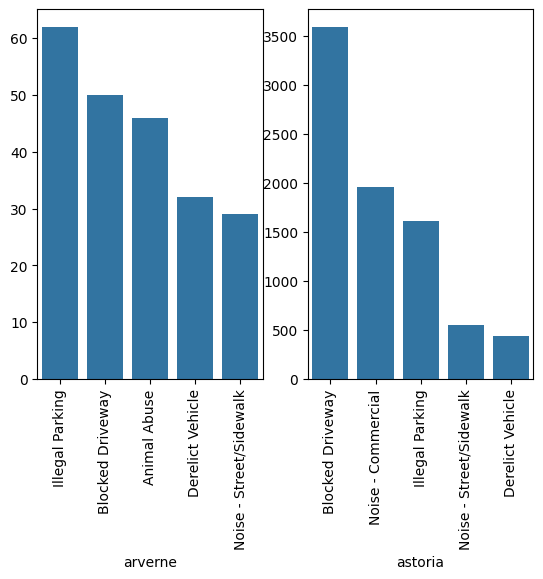

In [88]:
#Display barplot of top 5 complaints for 2 cities
dict_city_complaint_type_top5 = {}
for city, value in dict_city_complaint_type.items():
    dict_city_complaint_type_top5[city] = pd.Series(dict_city_complaint_type[city]).nlargest()
 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.subplot(1,2,1)
keys = pd.Index(dict_city_complaint_type_top5['arverne'].dropna().keys(), name='arverne')
vals = dict_city_complaint_type_top5['arverne'].dropna().values
sns.barplot(x=keys, y=vals)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
keys = pd.Index(dict_city_complaint_type_top5['astoria'].dropna().keys(), name='astoria')
vals = dict_city_complaint_type_top5['astoria'].dropna().values
sns.barplot(x=keys, y=vals)
plt.xticks(rotation=90)


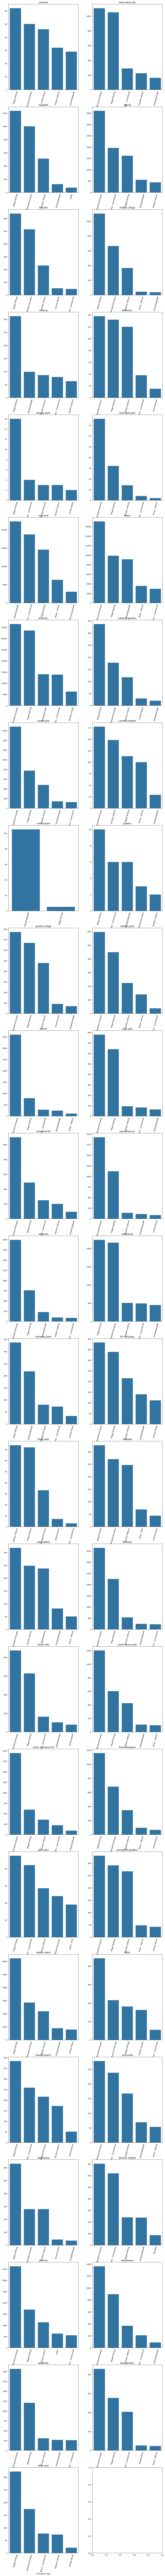

In [89]:
#Display barplot of top 5 complaints for all cities
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axs = plt.subplots(25, 2, figsize=(15,250))
city_names = list(dict_city_complaint_type_top5.keys())
#plt.figure(figsize=(25,100))

for i in enumerate(city_names):
    keys = dict_city_complaint_type_top5[i[1]].dropna().keys()
    vals = dict_city_complaint_type_top5[i[1]].dropna().values    
    plt.subplot(25,2,i[0]+1)    
    sns.barplot(ax = axs[i[0]%25,i[0]%2], x=keys, y=vals)
    axs[i[0]%25,i[0]%2].set_title(i[1])
    plt.xticks(rotation=75)
plt.show()

Text(0.5, 1.0, 'floral park')

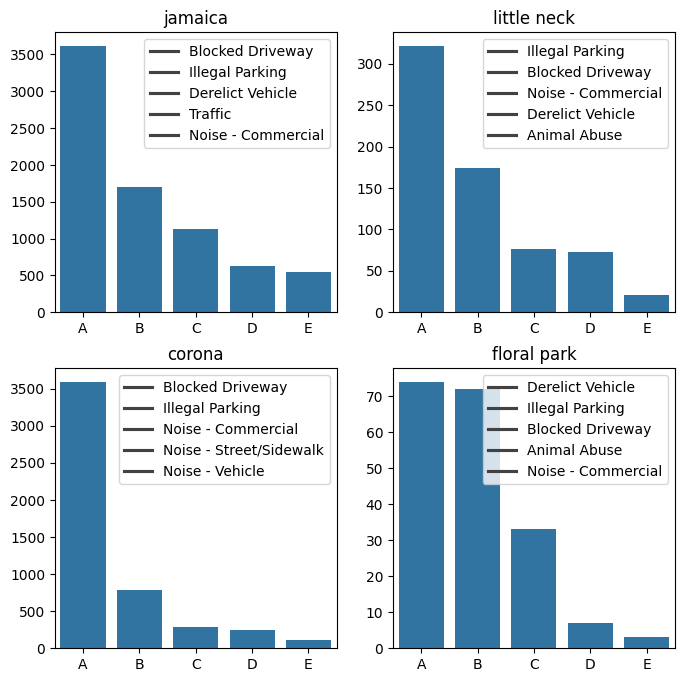

In [91]:
import seaborn as sns
fig, axs = plt.subplots(2, 2, figsize=(8,8))
# fig.suptitle('Major types of complaints in each city')
city_names = list(dict_city_complaint_type_top5.keys())
# for i in range(10):
#     if count < len(city_names):
#         for j in range(5):
#             labels = dict_city_complaint_type_top5[city_names[count]].dropna().index
#             values = dict_city_complaint_type_top5[city_names[count]].dropna().values 
#             sns.barplot(ax=axs[i,j], x=labels, y=values)
#             axs[i,j].set_title(city_names[count])
#             count += 1

xlabel = ['A','B','C','D','E']
labels = dict_city_complaint_type_top5['jamaica'].dropna().index
values = dict_city_complaint_type_top5['jamaica'].dropna().values
dict_lbl = {'A':labels[0],'B':labels[1],'C':labels[2],'D':labels[3],'E':labels[4]}
sns.barplot(ax = axs[0,0], x=list(dict_lbl.keys()), y=values)
axs[0,0].legend(list(dict_lbl.values()))
axs[0,0].set_title('jamaica')
labels = dict_city_complaint_type_top5['little neck'].dropna().index
values = dict_city_complaint_type_top5['little neck'].dropna().values
dict_lbl = {'A':labels[0],'B':labels[1],'C':labels[2],'D':labels[3],'E':labels[4]}
sns.barplot(ax = axs[0,1], x=list(dict_lbl.keys()), y=values)
axs[0,1].legend(list(dict_lbl.values()))
axs[0,1].set_title('little neck')
labels = dict_city_complaint_type_top5['corona'].dropna().index
values = dict_city_complaint_type_top5['corona'].dropna().values
dict_lbl = {'A':labels[0],'B':labels[1],'C':labels[2],'D':labels[3],'E':labels[4]}
sns.barplot(ax = axs[1,0], x=list(dict_lbl.keys()), y=values)
axs[1,0].legend(list(dict_lbl.values()))
axs[1,0].set_title('corona')
labels = dict_city_complaint_type_top5['floral park'].dropna().index
values = dict_city_complaint_type_top5['floral park'].dropna().values
dict_lbl = {'A':labels[0],'B':labels[1],'C':labels[2],'D':labels[3],'E':labels[4]}
sns.barplot(ax = axs[1,1], x=list(dict_lbl.keys()), y=values)
axs[1,1].legend(list(dict_lbl.values()))
axs[1,1].set_title('floral park')
# axes[0].set_title(bulbasaur.name)